#  Point-Cloud Acrobatics: From Raw LiDAR to Stunning 3D Visuals
###### by Tomaž Žagar and Alen Mangafić - tomaz.zagar and alen.mangafic monkey gis.si

Dive into the fascinating world of LiDAR data as we transform raw point clouds into striking 3D visualizations using a suite of open-source tools. This workshop begins by exploring the ASPRS standard, helping you understand essential concepts like point classifications, return numbers, and other fundamental attributes that define LiDAR data. You’ll learn how to correctly interpret these attributes, assess data quality, and leverage them for more insightful analysis.

Moving beyond the basics, we’ll dig into powerful open-source workflows with PDAL, GRASS, WhiteboxTools for data reading, manipulation and spatial processing, and with tools like QGIS, Potree and pybabylonjs for dynamic 3D rendering. We’ll also introduce TileDB as a robust storage option to manage point-clouds as massive dataframes. Along the way, we’ll tackle real-world tasks like gridding, interpolation, vectorization, and classification, highlighting effective approaches to manage and visualize large-scale point clouds in a reproducible manner.

By integrating Python scripts with these specialized tools, you’ll discover how to automate complex processing chains and generate stunning outputs that bring your LiDAR data to life. While basic Python knowledge is helpful, it’s not mandatory — anyone eager to learn new techniques can follow along. By the end of this hands-on workshop, you’ll not only grasp the core concepts behind LiDAR data but also have the practical skills to handle and present it in exciting, visually compelling ways.

## 0 Set up before you start

### 1 Set up your keyboard. The live ISO starts with a US keyboard by default.

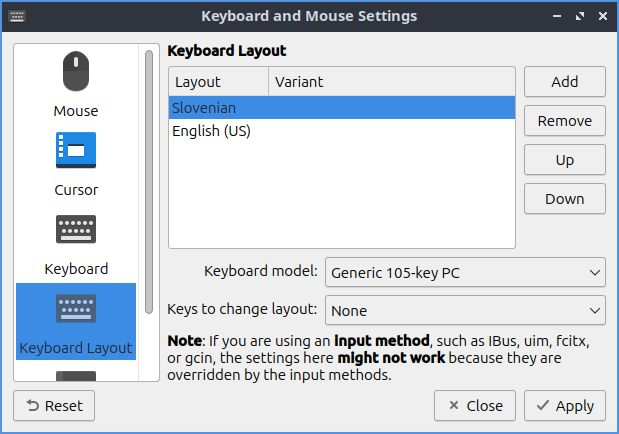

### 2 Set up your python interprter

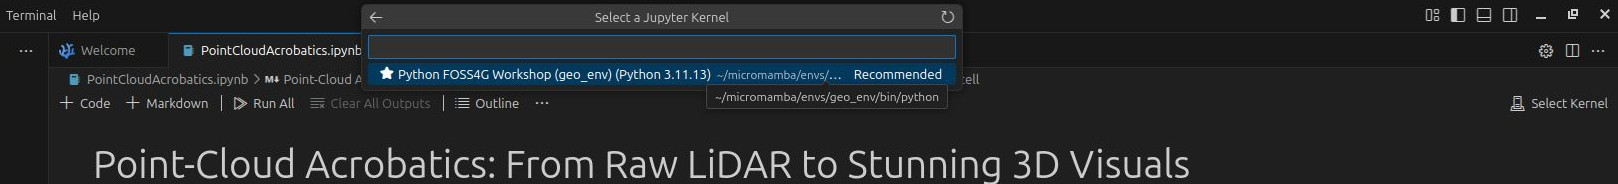

### 3 There are a few bugs that this tutorial encounts cause we do everythig on a live USB or read data from an USB and combine things in our way - we found solutions! :P If you follow thos tutorial from our OVA, you wont have such issues.

- When you open QGIS for your first time: set the keyring, close it and reopen it. Don't ask why.
- CloudCompare has issues with rading LAZ files from a USB. It reads them awesomely from a normal disk. So for CC testing - open LAS file.


## 1 LiDAR Fundamentals & Data Standards

## 1.1 What is LiDAR & Why It's Really Cool

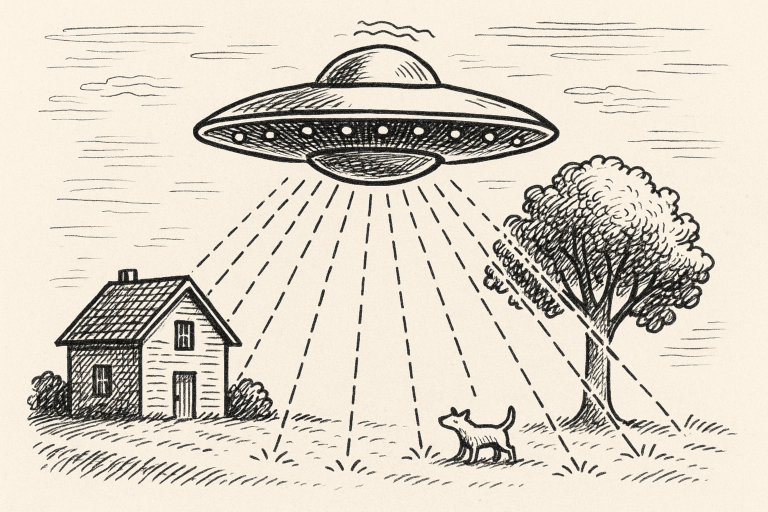

**LiDAR (Light Detection and Ranging)** is a remote sensing technology that uses laser pulses to measure distances to objects. It’s widely used in various industries and applications:

- **Cars** for obstacle detection and autonomous navigation  
- **Tractors** for precision agriculture  
- **Industrial robots** for mapping and collision avoidance  
- **Bathymetry** (shallow water mapping) using green-wavelength LiDAR  
- **But in our context**, we focus on **airborne LiDAR**

---

#### Core Principles

- **Pulsed Laser**: A LiDAR sensor emits rapid pulses of laser light (commonly near-infrared or green for bathymetry).
- **Time-of-Flight**: The time it takes for each pulse to return from a surface is used to compute distance.
- **Point Cloud Generation**: These distances, combined with GNSS/IMU data, are converted into 3D coordinates, resulting in a georeferenced point cloud.

---

#### Key Advantages

- **Canopy Penetration**: Airborne LiDAR can measure ground elevation even beneath vegetation.
- **High Accuracy**: Provides centimeter-level horizontal and vertical resolution.
- **3D Structure Capture**: Enables analysis of complex terrain, vegetation layers, and built environments.
- **Multiple Returns**: Each pulse can return multiple echoes (e.g. treetop, understory, ground), revealing vertical structure.
- **Full-Waveform Capture**: Advanced systems record the entire return signal shape-not just points-nabling better object differentiation.
- **Discrete Returns**: Most commonly used format—represents what we "see" in practice; it’s a simplified, efficient transformation of the full signal.

LiDAR captures the world as structured 3D data - penetrating through vegetation, mapping underwater terrain (in bathymetric setups), and preserving the spatial complexity of natural and urban environments. It’s not just about points - it’s about understanding the surfaces and volumes they represent.


- Question: What is the difference between a DSM and a DTM?

## 1.2 Anatomy of a Point Cloud

Point clouds are collections of 3D points in space that represent the geometry of physical objects or environments. They are commonly used in LiDAR (Light Detection and Ranging) data collection, and understanding their anatomy is crucial for effective analysis. In this chapter, we will dive deep into the **essential attributes** of point clouds, the **ASPRS classification scheme**, the differences between **LAZ** and **LAS** formats, the **compression battle**, and the revolutionary **COPC** format.

## Essential Attributes: Classification, Return Number, Intensity, RGB, NIR, GPS Time, Scan Angle

### Classification
**Classification** is one of the most important attributes in a point cloud. It refers to the assignment of a label to each point in the cloud based on its characteristic or the object it represents. 

The **ASPRS Classification Scheme** is a standardized classification system used to categorize LiDAR points based on their characteristics. It provides a consistent way to describe the objects that each point represents.
https://www.asprs.org/wp-content/uploads/2019/03/LAS_1_4_r14.pdf

In the meantime, R00 for LAS 1.5 was published [here](https://asprsorg.sharepoint.com/sites/PublicAccess/Shared%20Documents/Forms/AllItems.aspx?id=%2Fsites%2FPublicAccess%2FShared%20Documents%2FPublic%5FDocuments%2FStandards%2FLAS%2Fasprs%5Flas%5Fformat%5Fv15%5Fr00%5F2025%2Epdf&parent=%2Fsites%2FPublicAccess%2FShared%20Documents%2FPublic%5FDocuments%2FStandards%2FLAS&p=true&ga=1).


### Common Classifications:
- **Class 1**: Unclassified
- **Class 2**: Ground
- **Class 3**: Low Vegetation
- **Class 4**: Medium Vegetation
- **Class 5**: High Vegetation
- **Class 6**: Building
- **Class 7**: Low Point (Noise)
- **Class 8**: Model Key Points
- **Class 9**: Water
- **Class 10**: Reserved for future use

These classes help distinguish between different objects and surfaces, making it easier to analyze and process point cloud data. Understanding these classes is essential for effective classification, feature extraction, and visualization.
Other classifications include **power lines**, **bridges** and many more.

**Important**:
- **ground doesn't mean bare soil!**
- **vegetation classes are not standardised in means of height!**

---

### Return Number
LiDAR systems usually emit multiple laser pulses that can reflect off different surfaces before returning to the sensor. The **return number** is an integer value that identifies the order of a specific pulse’s reflection. 
- **First return**: The first surface hit (often the top of vegetation or buildings).
- **Last return**: The last surface hit (often the ground surface).
- **Intermediate returns**: Additional surfaces that the pulse encounters between the first and last return.

The **return number** helps to separate points based on the surface type they represent.

---

### Intensity
**Intensity** refers to the strength of the returned signal from the LiDAR pulse. The intensity value is typically proportional to the amount of light that the surface reflects back to the sensor, which can vary based on the material, surface roughness, and angle of incidence. Intensity values can be used to classify the type of surface (e.g., water, vegetation, roads).

---

### GPS Time
**GPS time** is the timestamp indicating when the LiDAR sensor collected the point. This attribute can be crucial when working with time-dependent data, such as tracking changes over time or aligning data from multiple LiDAR scans. GPS time provides context for the point cloud data by linking each point to a specific moment in time.

### RGB
**RGB** values represent the color of each point in the point cloud. When LiDAR sensors are equipped with cameras or other imaging systems, they can capture the color of the points along with their spatial position. This information is stored in **Red, Green, Blue (RGB)** channels, similar to how colors are represented in digital images. RGB data can add realism to 3D visualizations and can be useful in distinguishing different features in the landscape.

### NIR
**NIR (Near Infrared)** refers to the reflectance of points in the near-infrared spectrum. Some LiDAR systems capture NIR data in addition to RGB, providing an extra layer of information about vegetation and other surfaces. NIR is particularly useful for distinguishing vegetation from other types of land cover, as plants reflect more in the near-infrared spectrum than other surfaces. This data can be used in vegetation classification, health monitoring, and land use analysis.

---

### Scan Angle
**Scan Angle** refers to the angle at which the LiDAR sensor scans the surface during data collection. It is an important attribute that helps to understand the sensor’s position and orientation relative to the target surface. The scan angle can affect the accuracy and density of the point cloud, as points acquired at extreme angles may have lower precision. The scan angle is typically recorded for each point and can be used in post-processing to correct distortions and enhance the quality of the data.

## 1.3 Data Formats Deep Dive

LiDAR data is typically stored in either **LAS** or **LAZ** formats. These formats are designed to store point cloud data efficiently and are widely supported by various software packages.

### LAS (LiDAR Data Exchange Format)
The **LAS format** is a standard for storing LiDAR point cloud data. It stores raw data, including coordinates, classification, intensity, return number, and other attributes. It is uncompressed, making it easy to read and access but larger in size compared to compressed formats.

### LAZ (Compressed LiDAR Format)
**LAZ** is the compressed version of the LAS format. It uses a lossless compression algorithm to reduce the file size without losing any data. LAZ files can be up to 80% smaller than LAS files, making them more suitable for storage and transmission over networks. However, compression adds some processing overhead when reading the data.

Point clouds are inherently **dense** and **continuous** in 3D space, making them well-suited for tasks like 3D modeling, terrain analysis, and environmental monitoring. However, converting them into vector formats requires specialized algorithms that handle the high density and complexity of the data.

---

## Compression Battle: LAZ vs. LAS (Size vs. Processing Tradeoffs)

The choice between **LAZ** and **LAS** often comes down to a trade-off between file size and processing speed:

- **LAZ** offers significant **compression** and is ideal for large datasets that need to be transmitted or stored efficiently. However, it requires more processing time to decompress and read the data.
- **LAS** is **uncompressed**, making it easier and faster to read and process but at the cost of larger file sizes.

The choice between LAZ and LAS depends on the specific needs of the project. If data transmission speed and storage are the primary concerns, LAZ is the way to go. If processing speed and direct access to raw data are more important, LAS may be more suitable.

---

## COPC Revolution

The **COPC** (Cloud-Optimized Point Cloud) format represents a significant advancement in point cloud storage, offering a more efficient way to store and stream point cloud data over the web. COPC is optimized for **cloud storage**, making it ideal for **cloud-based workflows** and streaming applications.

### Virtual Tiling Concept (Spatial Indexing)
COPC uses **virtual tiling**, which divides the point cloud into small, manageable chunks or tiles. This approach allows for **spatial indexing**, enabling fast retrieval of only the relevant tiles needed for processing or visualization. Virtual tiling significantly reduces the amount of data that needs to be loaded into memory at any given time, improving performance.

### Octree Structure Explained
The **octree structure** is a hierarchical method for spatially organizing 3D point clouds. It divides the space into octants (eight regions), and each octant can be subdivided further as needed. This structure allows for efficient storage and retrieval of point cloud data, especially when combined with virtual tiling. Octrees enable fast access to specific regions of the point cloud, making them ideal for cloud-based applications where fast streaming and processing are critical.

### Cloud-Optimized Streaming Benefits
COPC’s cloud-optimized structure offers several benefits for streaming large point clouds:
- **Efficient data transfer**: Only the necessary tiles are streamed, reducing the amount of data transferred.
- **Scalability**: COPC is designed to handle massive datasets, making it ideal for large-scale LiDAR projects that require cloud storage and processing.
- **Faster access**: By organizing data in an octree structure, COPC allows for fast, random access to point cloud data, even over slow networks.

These features make COPC an excellent choice for modern point cloud applications that require **scalable**, **efficient**, and **fast access** to massive datasets.

## 2 Visual Exploration & Manual Processing

## 2.1 First Contact: CloudCompare

- **CloudCompare** offers native support for `.LAS` and `.LAZ` point cloud formats.
- **Raster creation** tools allow generation of 2D raster layers from point clouds (e.g., elevation, density, intensity).
- **Advanced visualization** options include shading, scalar fields, normals, profiles, and 3D rendering with real-time interaction.
- **Extensible via plugins**—many official and community plugins exist for registration, segmentation, classification, M3C2 distance, and more.
- **Additional tools** include mesh generation, volume calculation, cross-sections, and manual or automated cleaning.


## Let's dig in!

1. Open CloudCompare  
2. Drag and drop **ALL** `.LAZ` or `.COPC` files (**OR** `.LAS`, if you read from an USB or use a live USB - read chapter 0)
3.  If you computer lags, just open **one LAZ** - the concepts are the same


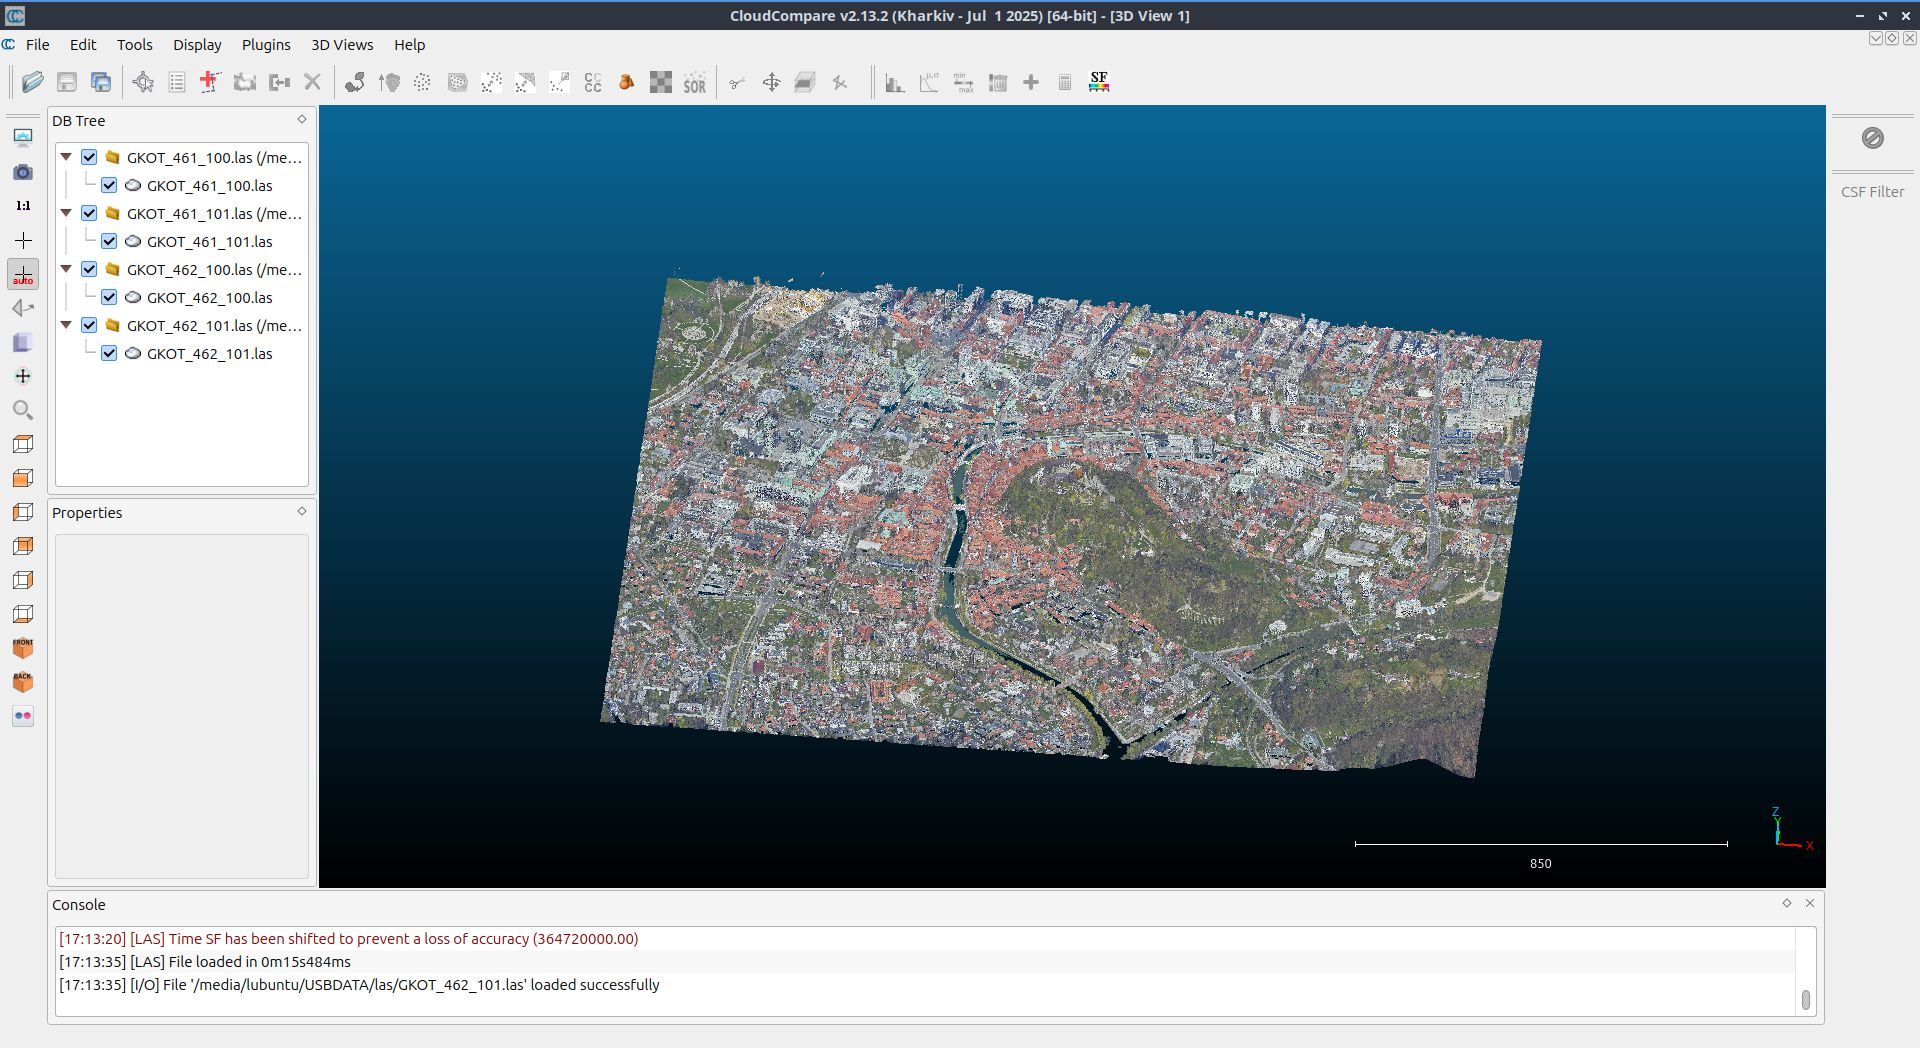

## Let's merge them!

Use the `Edit >  Merge` tool after selecting all loaded point clouds.
All the inputs have the same scalar fields (e.g., Intensity, Classification) so skip the creation of new ones


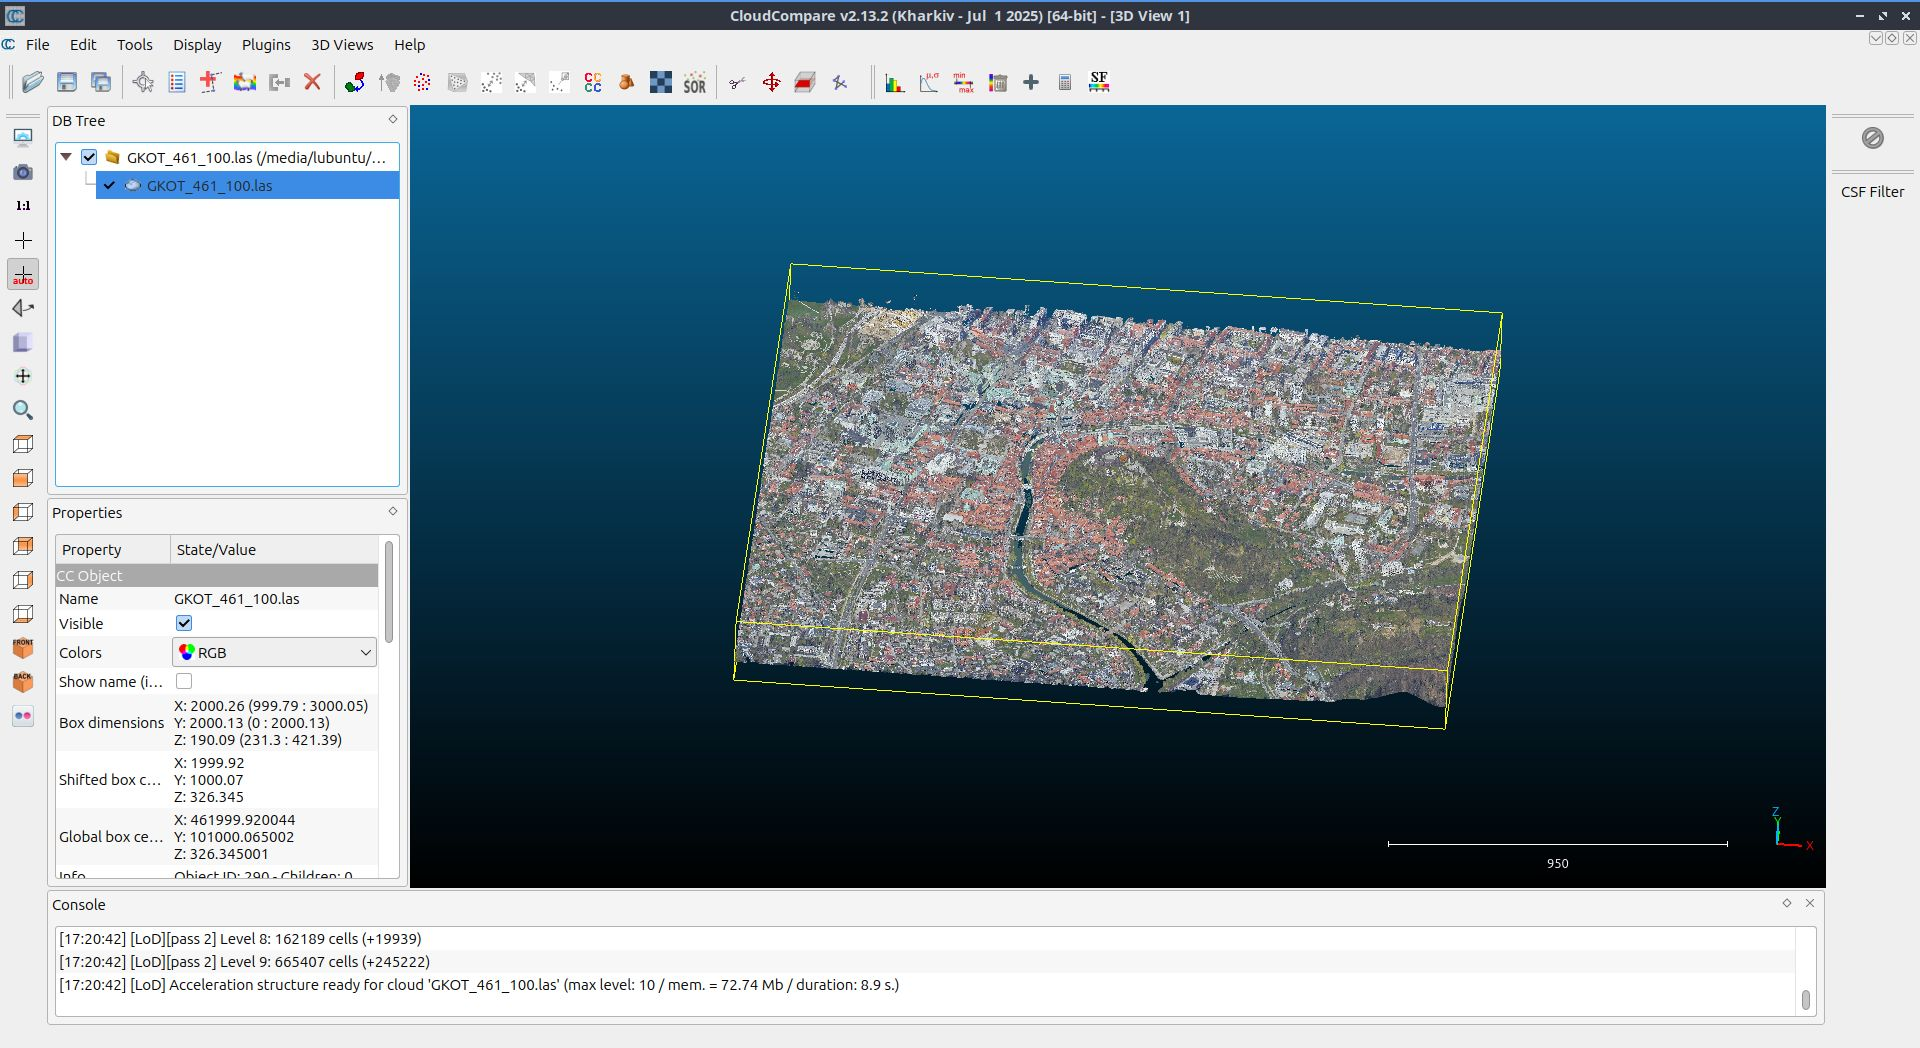

## Let's clip them

Use the `Edit > Segment` tool to trim the dataset to your area of interest.
Click the scissors!




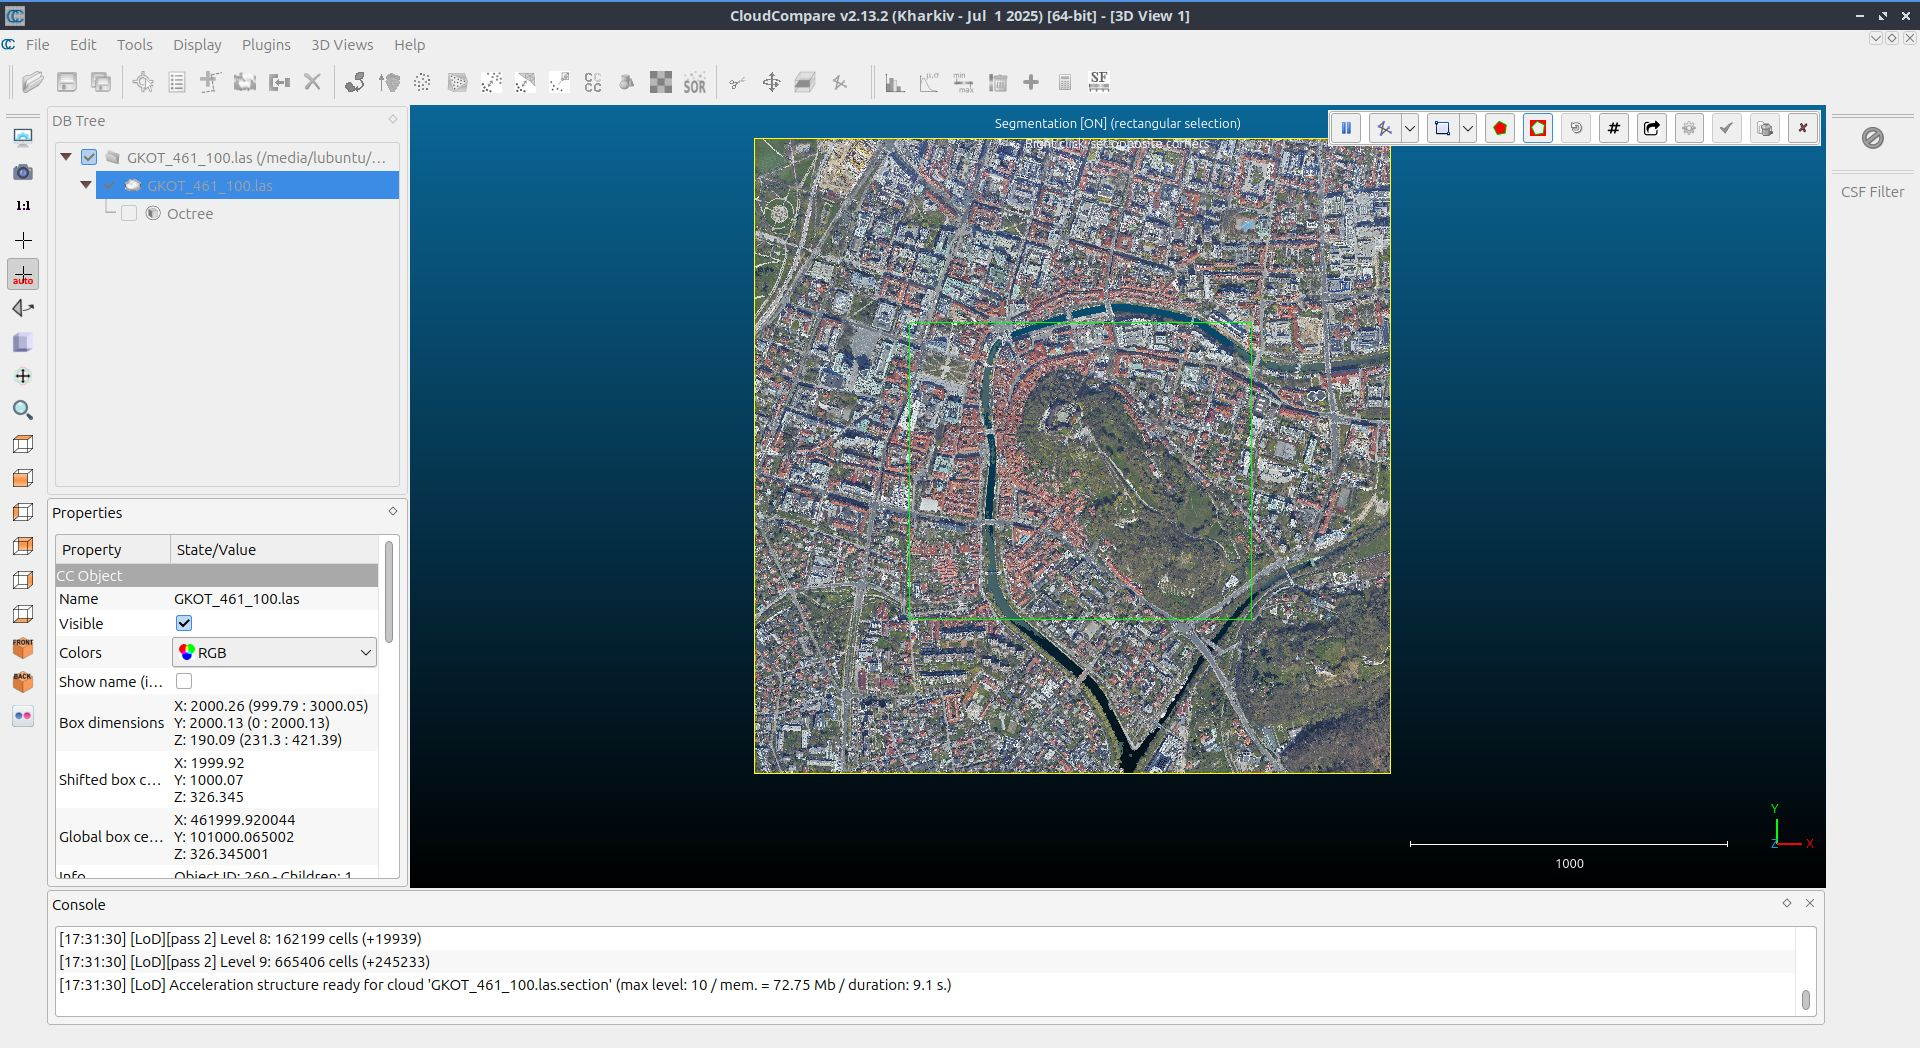

## Let's remove noise

Two primary filters are available for cleaning point clouds:

---

### 1. Statistical Outlier Removal (SOR)

- **Access**: `Tools > Clean > SOR filter`
- **Method**: Computes the average distance of each point to its *k* nearest neighbors. Points that are farther than the average distance plus a multiple of the standard deviation are considered outliers and removed.
- **Parameters**:
  - `k`: Number of nearest neighbors
  - `StdDev multiplier`: Threshold factor
- **Best for**: General noise removal in uniformly distributed point clouds.

---

### 2. Noise Filter

- **Access**: `Tools > Clean > Noise filter`
- **Method**: Fits a local plane around each point and removes points that are too far from this plane. This approach considers the distance to the underlying surface rather than just neighbor distances.
- **Parameters**:
  - `Radius` or `Number of neighbors`: Defines the local neighborhood for plane fitting.
  - `Max error`: Acceptable distance from the fitted plane.
- **Best for**: Cleaning noise from flat surfaces like walls or floors.

---

### Summary

- Use **SOR** for general-purpose noise removal, especially effective for uniformly distributed point clouds.
- Use **Noise Filter** when dealing with flat surfaces or when a more surface-aware approach is needed.

## Let's reclassify the ground points with the CSF filter

Use the **CSF plugin**:  
- Choose appropriate terrain type  
- Adjust slope/cloth resolution if needed  
- Run the filter to extract ground points

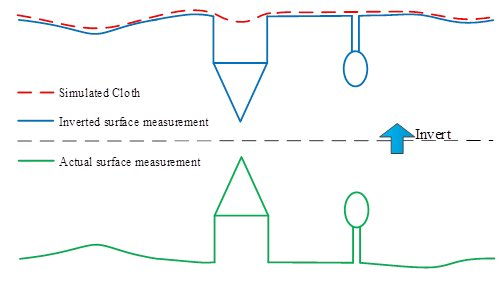

https://www.cloudcompare.org/doc/wiki/index.php/CSF_(plugin)

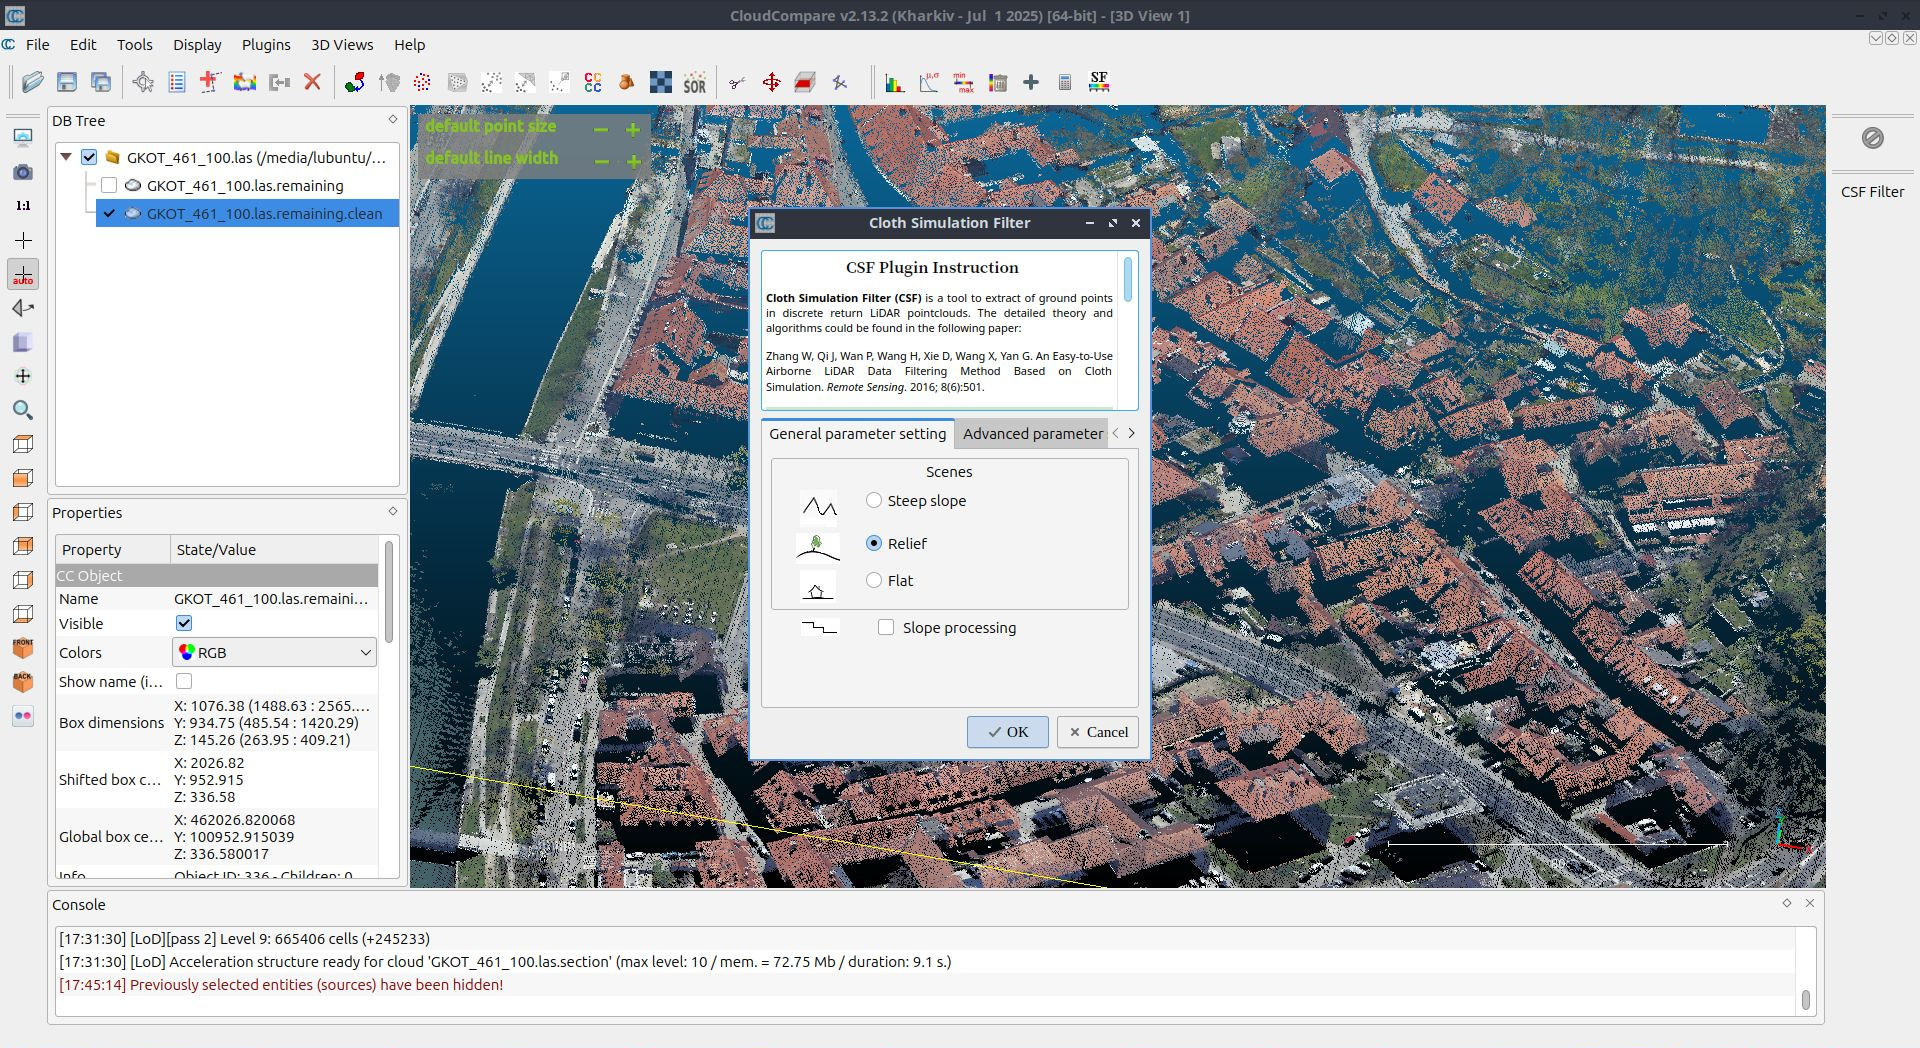

## Creating a 3D Mesh

1. **Compute normals**  
- Normals are vectors that point perpendicular from each surface or point.  
- They help define the "face direction" for rendering, lighting, and surface reconstruction.
`Edit > Normals > Compute`

---


2. **Run Surface Reconstruction**  
- Creates a watertight mesh suitable for visualization and export.
- Try `Plugins > PoisonRecon`
- and `Edit > Mesh > Delaunay 2.5`

---

3. **Simplify**  
- Use `Edit > Mesh > Subsample` to reduce triangle count. Your computer might burn if you skip this.

---

4. **Export as `.PLY`**  
- Compatible with QGIS Mesh Layer. **Do this at home! It is a heavy process!!.**
- In QGIS: **Layer > Add Layer > Add Mesh Layer**

## 2.2 GIS Integration: QGIS
- **QGIS 3.18** introduced native support for point clouds, allowing direct loading of `.LAS`, `.LAZ`, and `.EPT` files.
- **QGIS 3.26** added support for Cloud Optimized Point Cloud (COPC) files, enabling efficient streaming and visualization without the need for indexing.
- **Symbology options** include attribute-based coloring, RGB, classification, and more, enhancing visualization in both 2D and 3D views.
- **QGIS 3.32** expanded point cloud processing capabilities, introducing tools for format conversion, raster export, clipping, and more within the Processing Toolbox.
- **The 3D Map View** allows interactive exploration of point clouds, with features like eye-dome lighting and adjustable point rendering settings.


- **Important to mention:** point clouds were already supported for many years through plugins like LAStools, FUSION and WhiteboxTools.

## Set your CRS settings: we work with Slovenian LiDAR data so let's set this to **EPSG:3794**

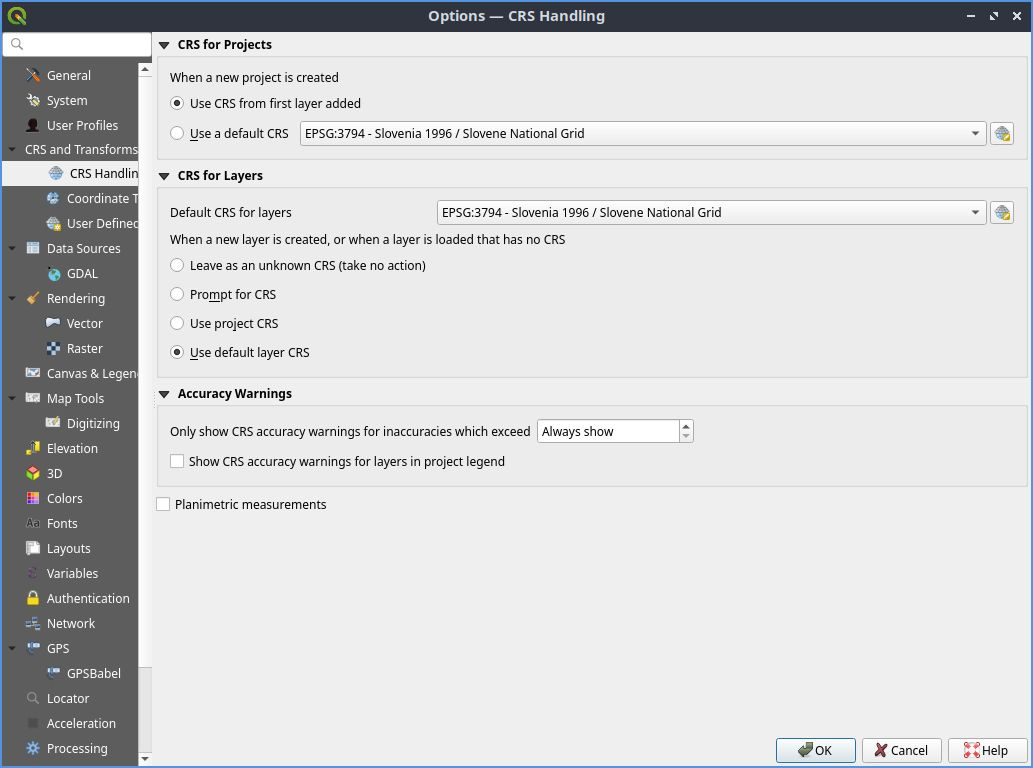


## Open the Processing Toolbox and check the Point Cloud tools avaiable.

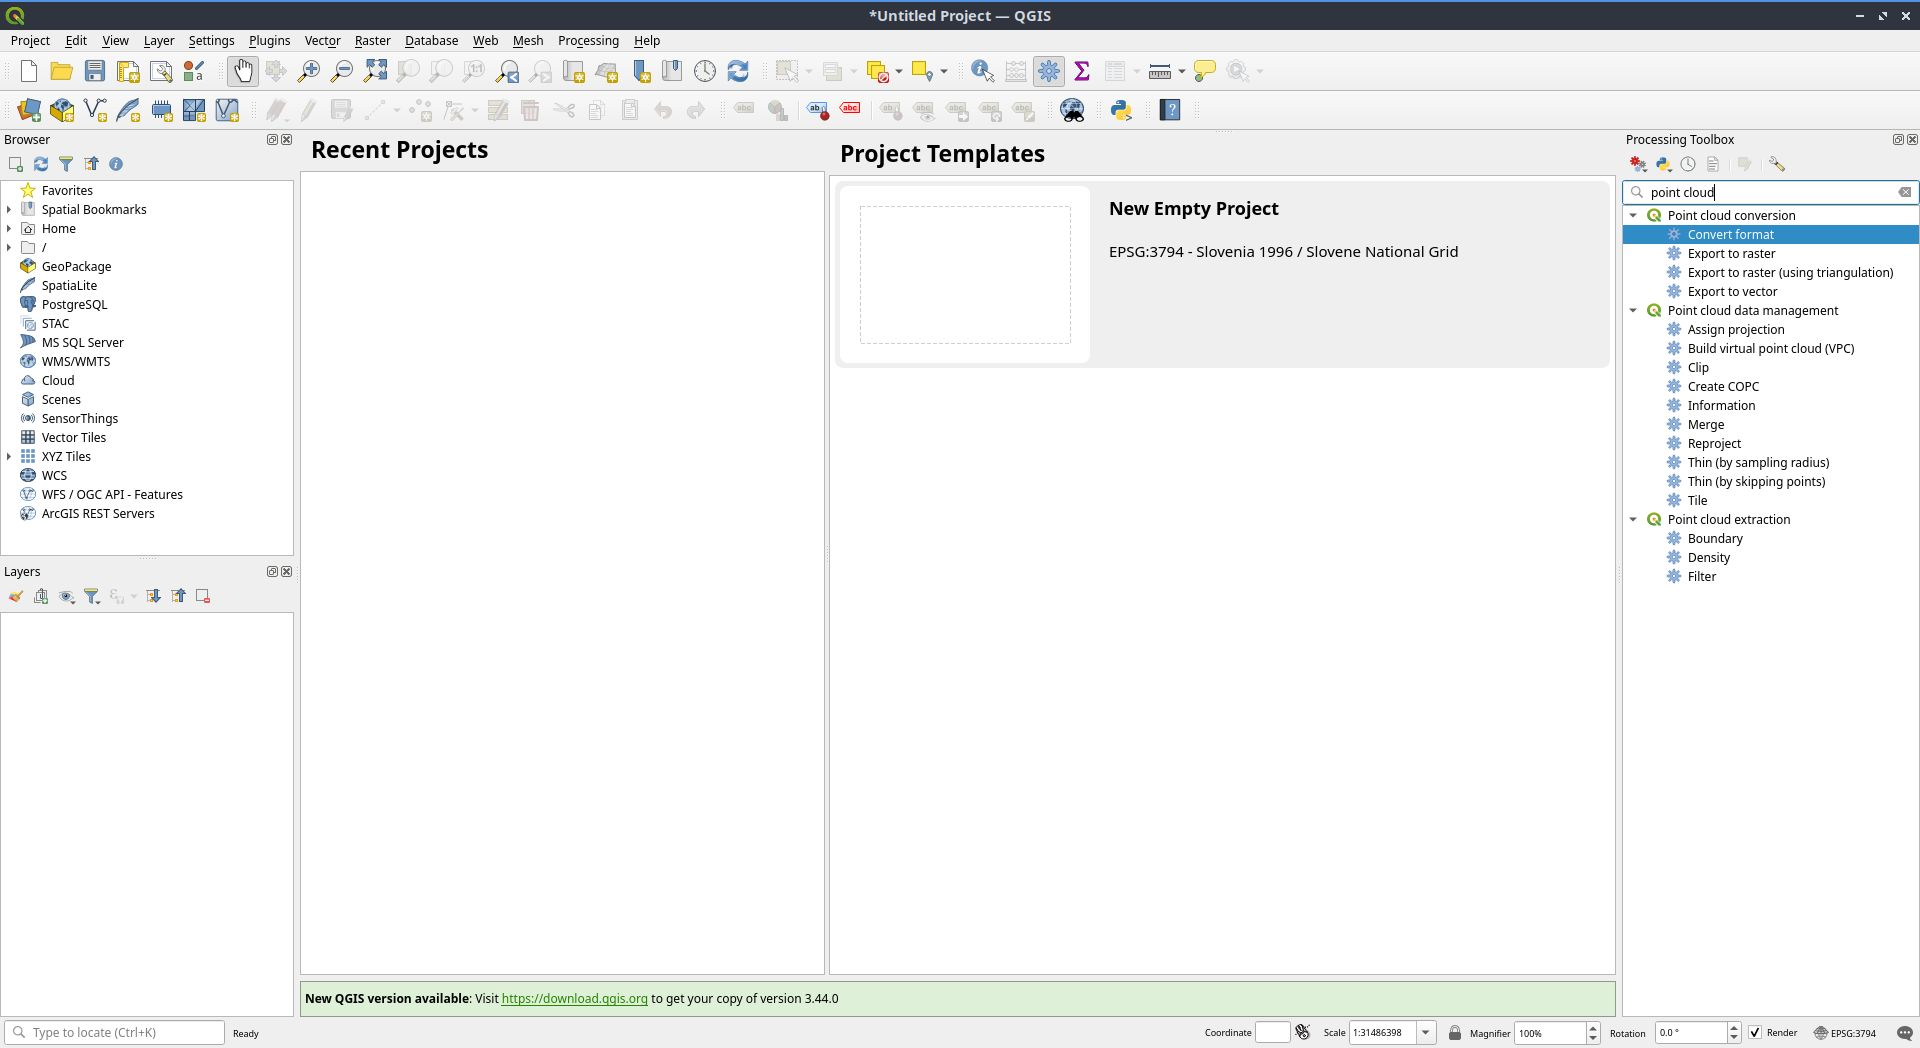

## Creating a DTM and DSM

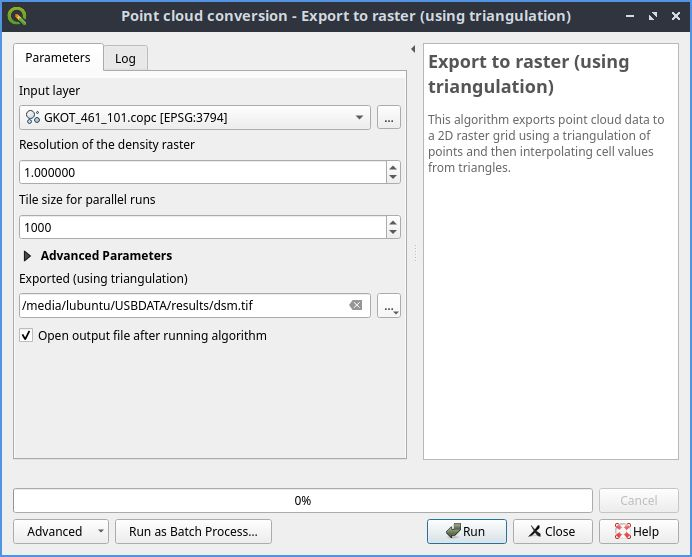


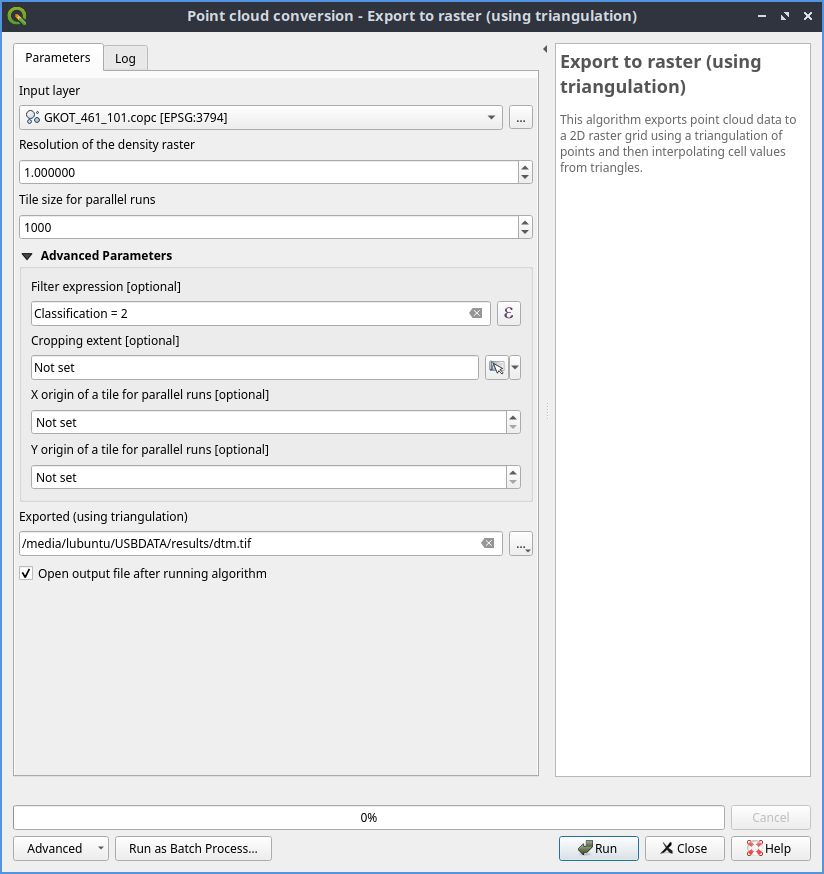

## Virtual Point Clouds

- QGIS virtual point clouds (`.vpc`) link multiple point cloud files without merging them. Similar to `.vrt` for rasters
- They allow fast, scalable visualization and filtering of large datasets.  
- Only visible parts load dynamically—great for performance.  
- Support attribute-based styling (e.g. height, classification).  
- Can be used in 2D and 3D views alongside other GIS layers.

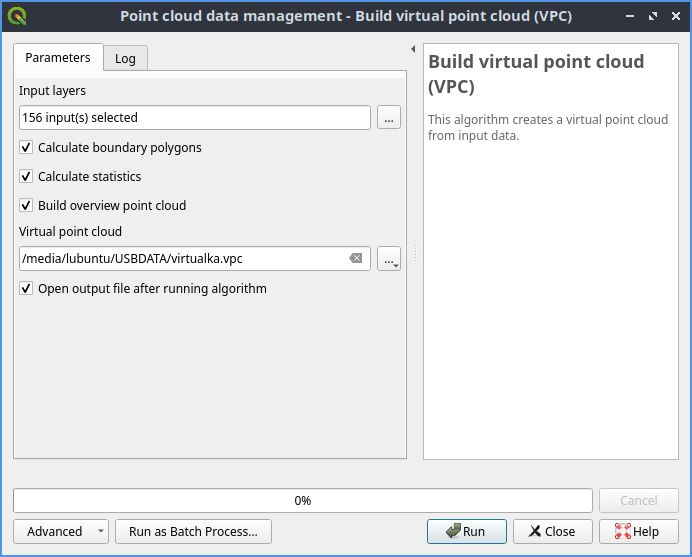

## No need to create one now - check it at home - now let's open an existing one

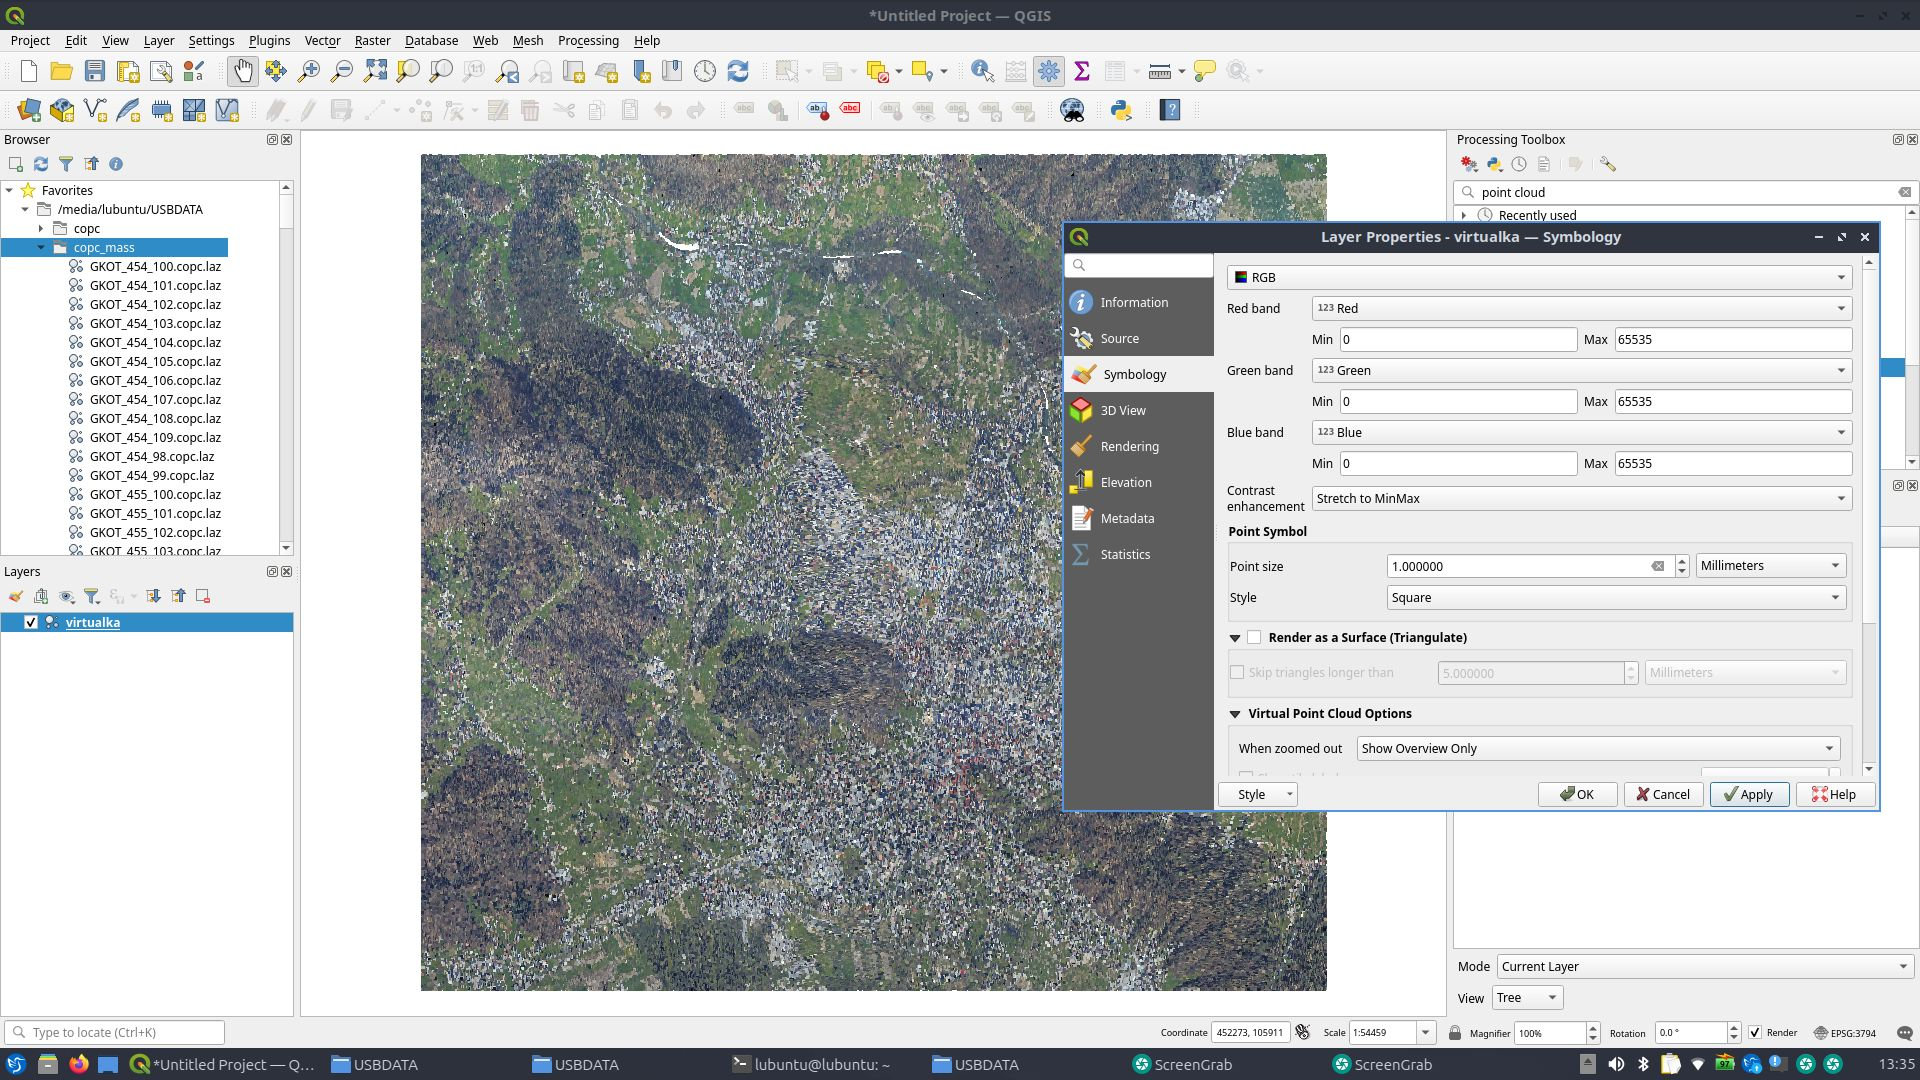


## Open a 3D Map and check it's features

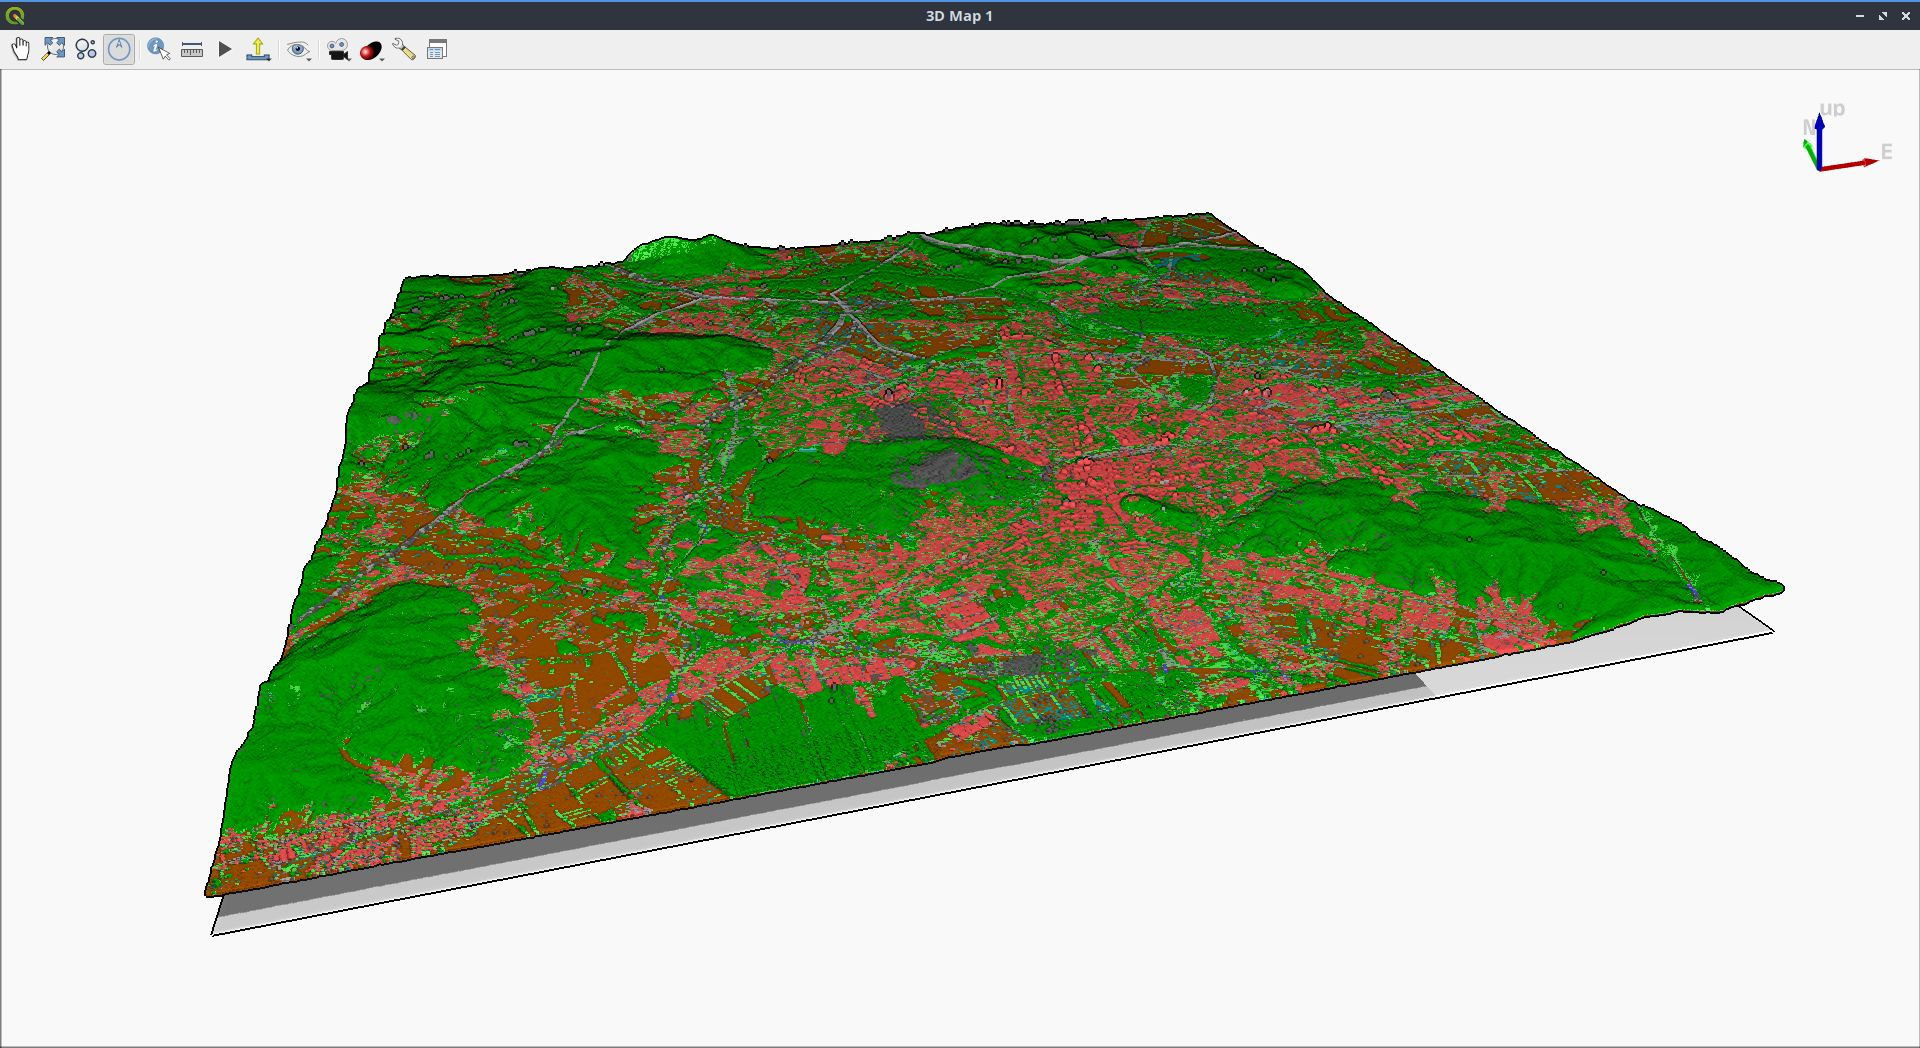

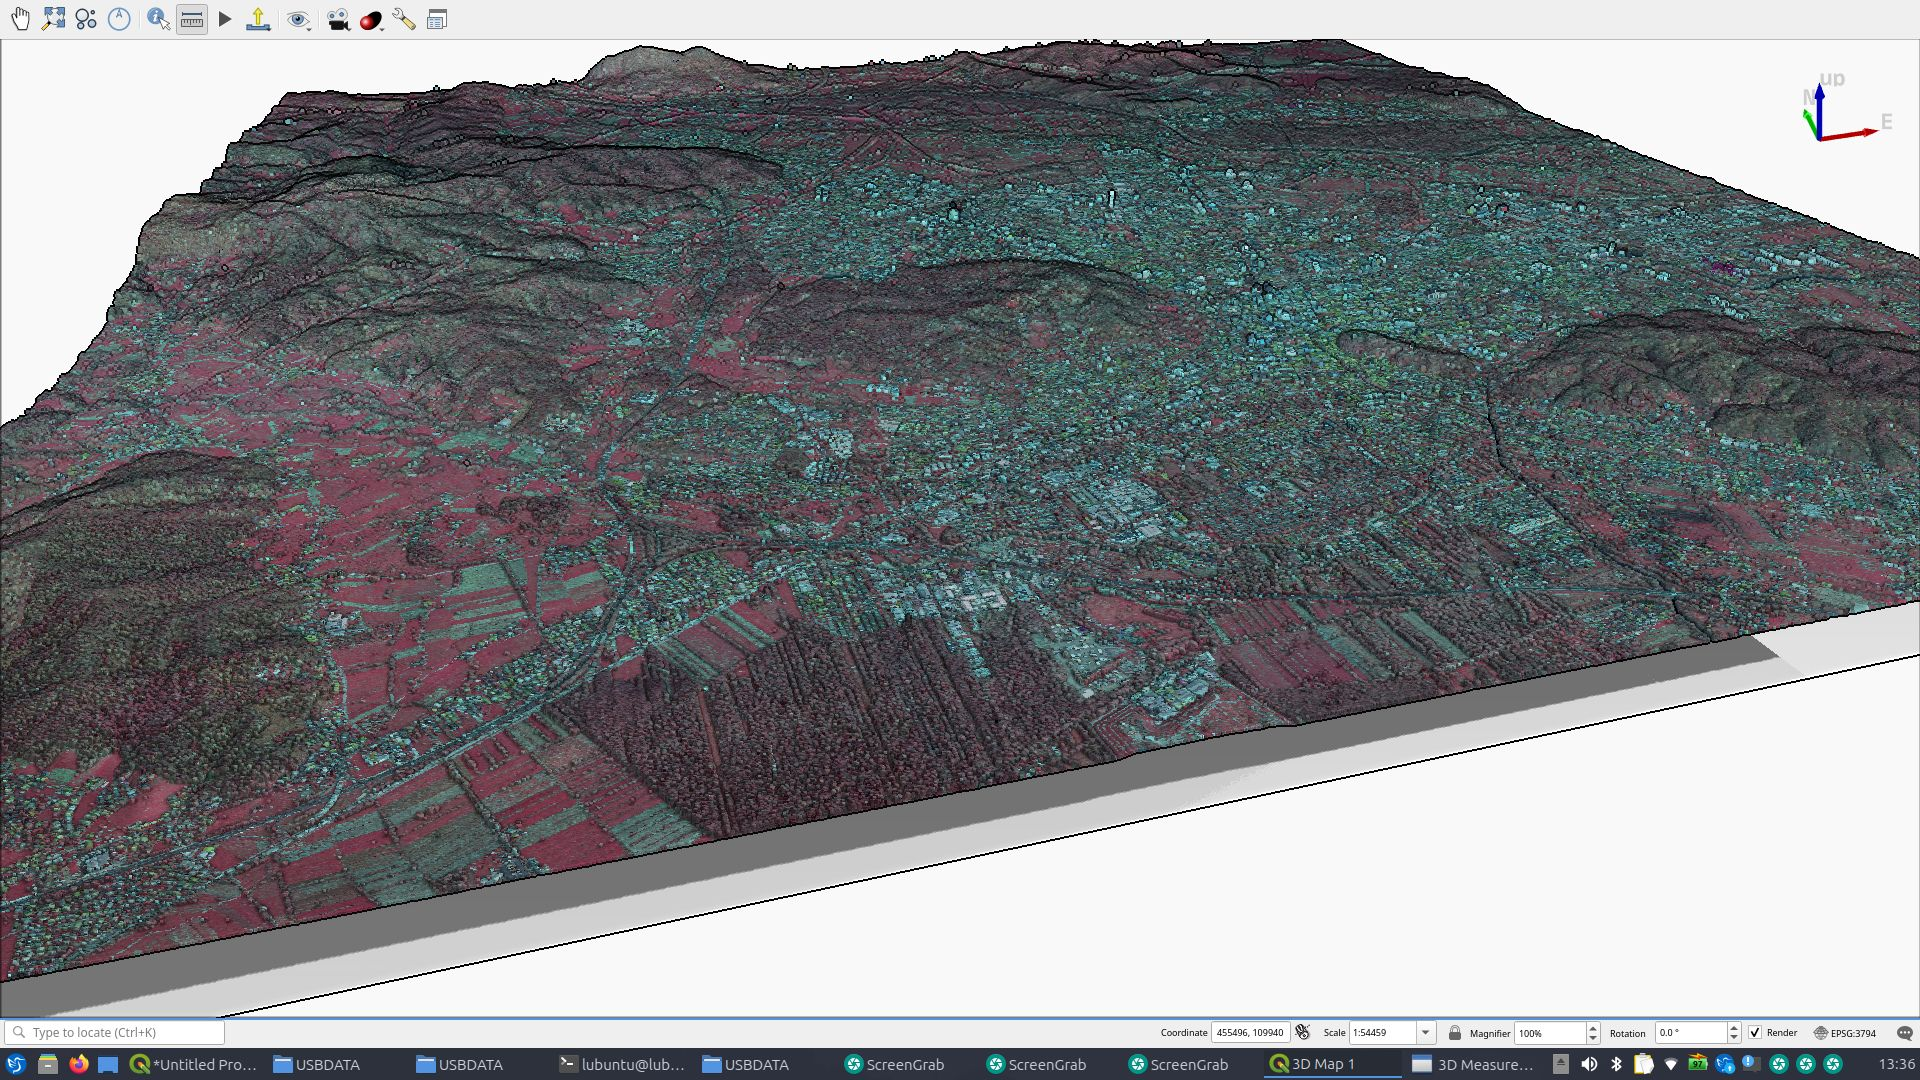

### Open the `Elevation Profile tool` and create a cool section

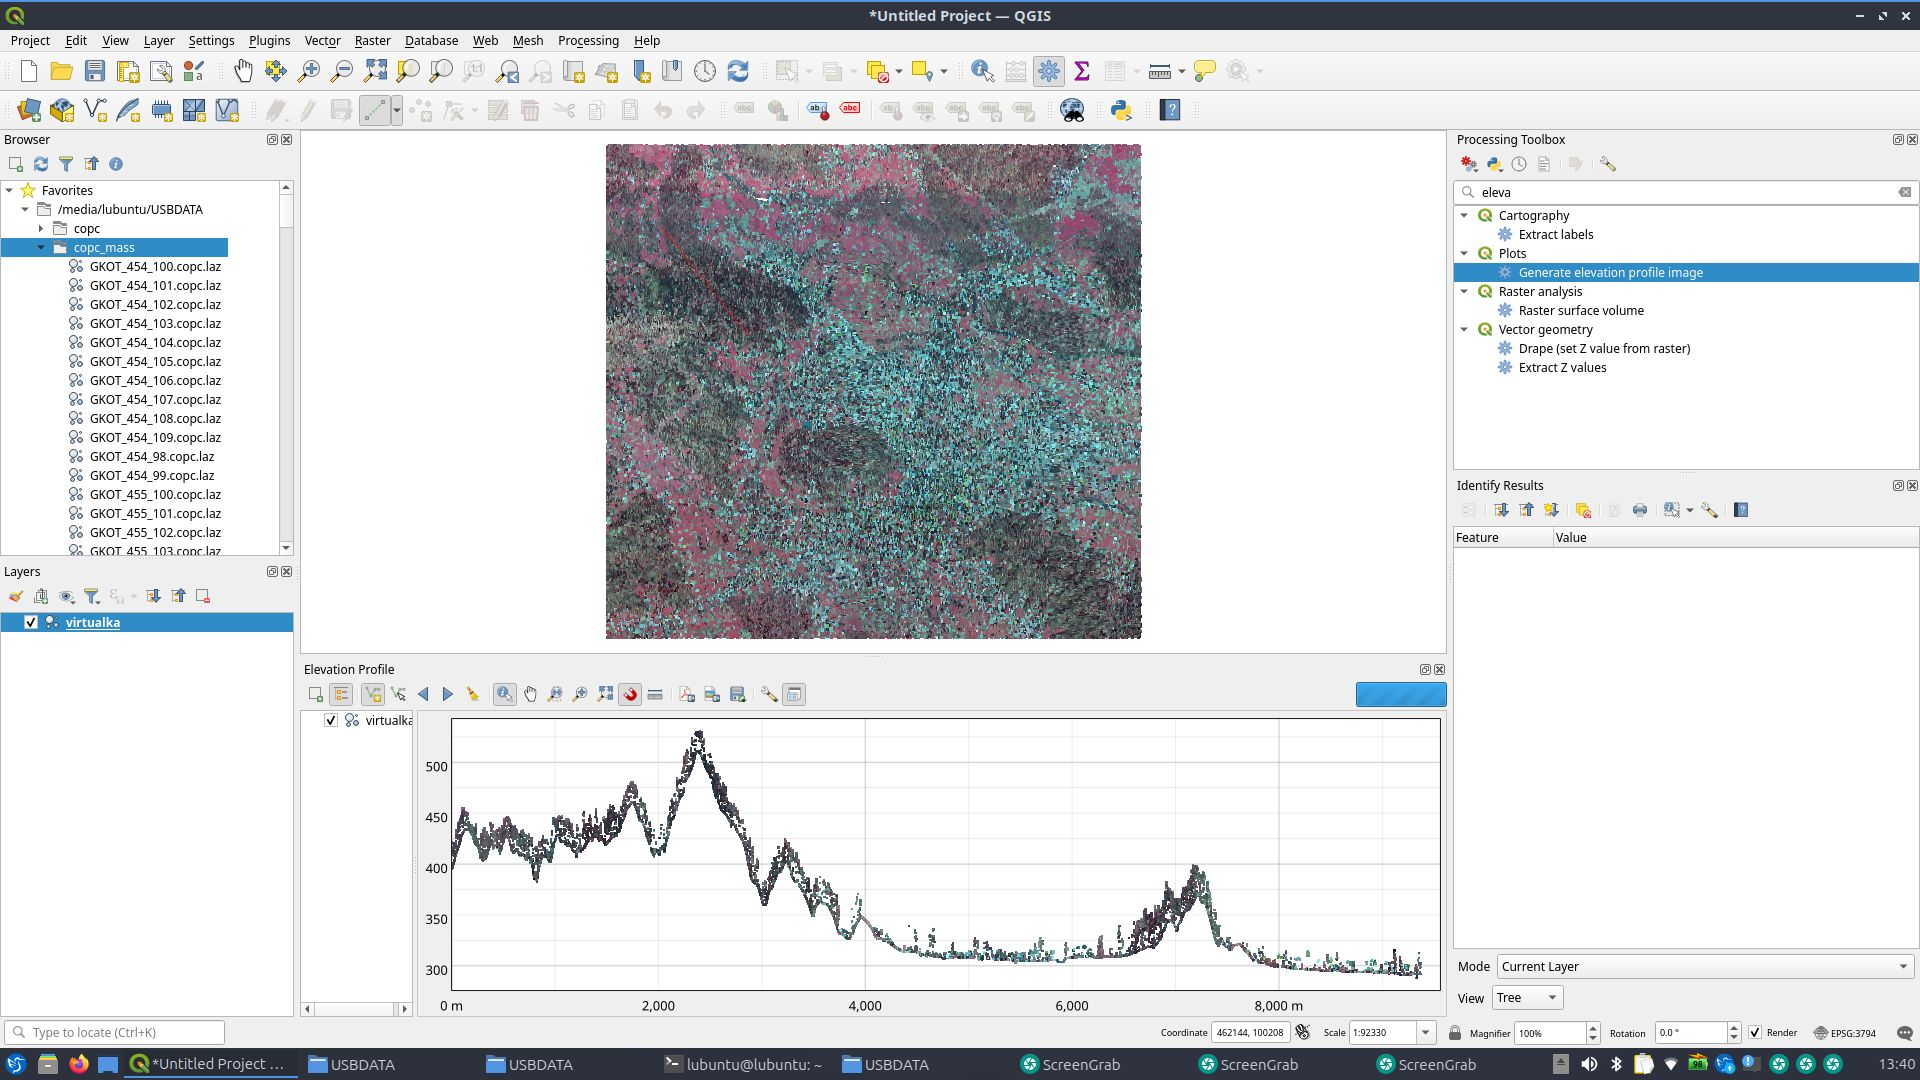

## 3 The PDAL Engine Revealed

### 3.1 PDAL: The Universal Translator

- We created some elevation models and interpolated heights in QGIS – behind that was **PDAL**!
- PDAL (Point Data Abstraction Library) is a powerful backend tool used for reading, filtering, transforming, and writing point cloud data.
- It's like GDAL, but for point clouds.
- QGIS relies on PDAL for many operations like raster generation, clipping, reprojecting, and metadata reading.
- PDAL supports many formats (LAS, LAZ, BPF, E57, etc.) and works well in pipelines for automated processing.
- Command-line basics: info, translate, pipeline

```bash
pdal translate input.laz output.copc.laz --writer copc

### 3.2 Pipeline Power

PDAL pipelines allow you to chain multiple operations: reading, filtering, transforming, and writing in a single structured workflow.

---

#### JSON Structure Dissection

A PDAL pipeline is a JSON array where each element defines a processing stage:

```json
[
  { "type": "readers.las", "filename": "input.laz" },
  { "type": "filters.outlier", "method": "statistical", "mean_k": 20, "multiplier": 2.0 },
  { "type": "filters.csf", "classify": "true" },
  { "type": "filters.range", "limits": "Classification[2:2]" },
  { "type": "writers.gdal", "filename": "dtm.tif", "resolution": 1.0, "output_type": "min" }
]


### Here's an example of a full PDAL pipeline that computes HAG (Height Above Ground) for GKOT_461_101.copc.laz, using ground classification and storing the result:

```json
[
  {
    "type": "readers.las",
    "filename": "GKOT_461_101.copc.laz"
  },
  {
    "type": "filters.hag_delaunay"
  },
  {
    "type": "writers.copc",
    "filename": "GKOT_461_101_hag.copc.laz",
    "a_srs": "EPSG:3794",
    "extra_dims": "HeightAboveGround=float32"
  }
]
  

## This is the way:

```bash
pdal pipeline hag_pipeline.json

## Open it in QGIS and see how cool it is!

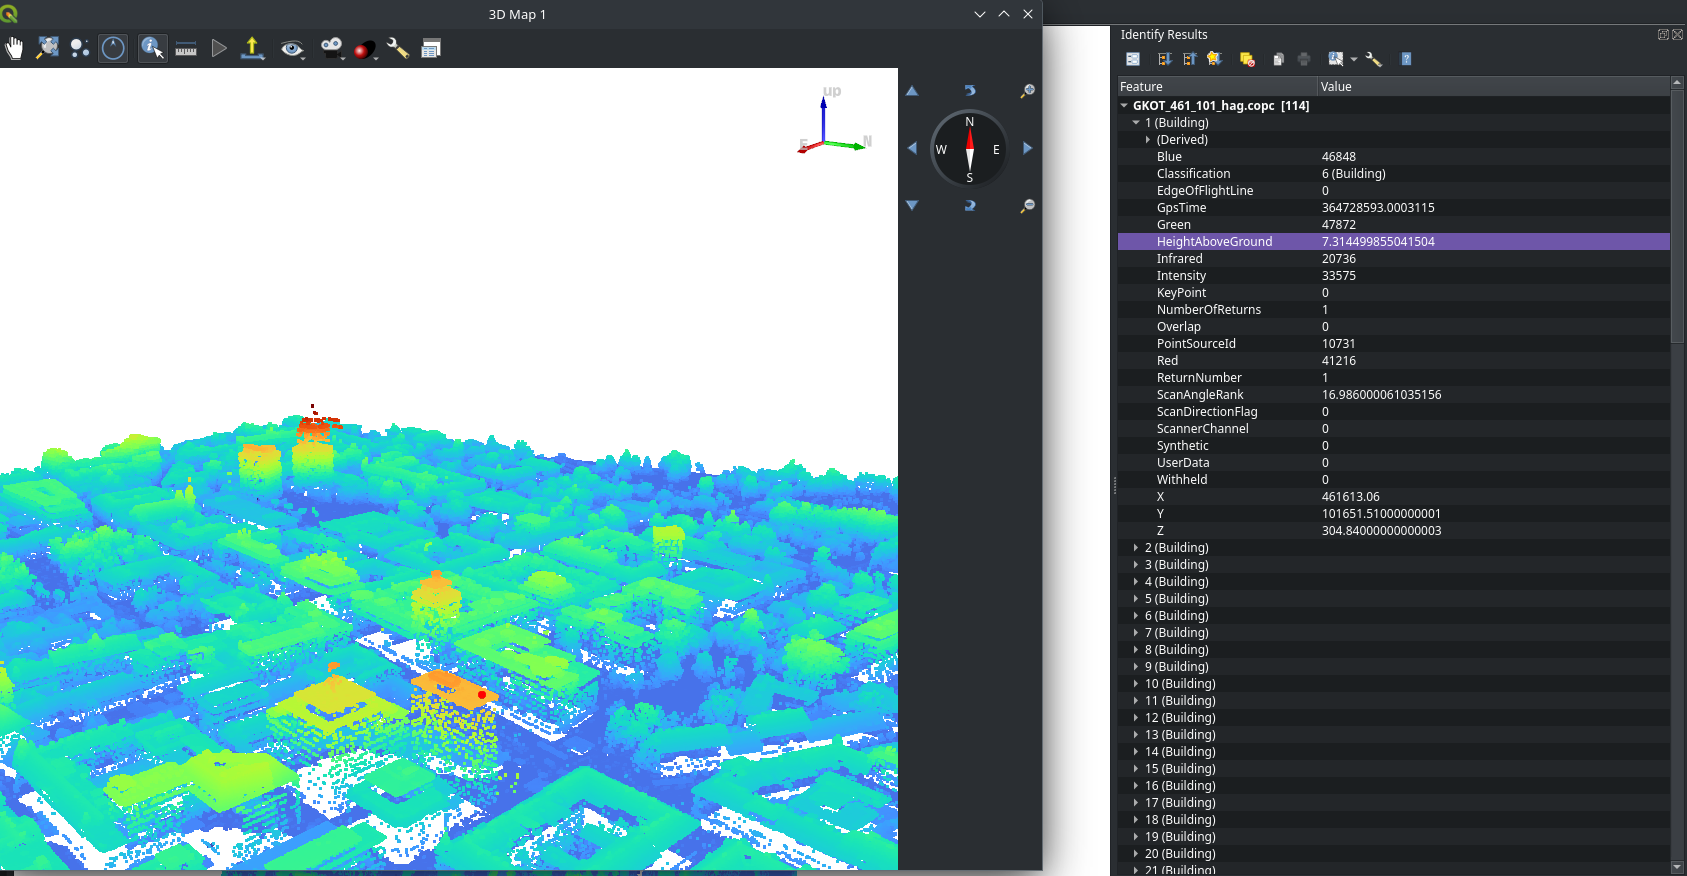

## 4 Python Automation Power Session!
## PDAL, GRASS, Whitebox & Python for End-to-End Workflows


### How to convert all the LAZ files from a folder to COPC
We do it with LAS files if we read data from a USB or use a live USB.

In [ ]:
import subprocess
import json
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed

input_dir = Path("/media/lubuntu/USBDATA/laz/")
laz_files = list(input_dir.glob("*.laz"))

def convert_to_copc(laz_path):
    copc_path = laz_path.with_suffix(".copc.laz")
    pipeline = {
        "pipeline": [
            str(laz_path),
            {
                "type": "writers.copc",
                "filename": str(copc_path)
            }
        ]
    }
    try:
        subprocess.run(
            ["pdal", "pipeline", "--stdin"],
            input=json.dumps(pipeline),
            text=True,
            check=True,
        )
        return f"Converted: {copc_path.name}"
    except subprocess.CalledProcessError:
        return f"FAILED: {laz_path.name}"

with ThreadPoolExecutor(max_workers=8) as executor:
    futures = [executor.submit(convert_to_copc, f) for f in laz_files]
    for future in as_completed(futures):
        print(future.result())


In [ ]:
import os
import subprocess
import sys
import pdal
import tiledb
import laspy
import pandas as pd
import geopandas as gpd
import numpy as np
import pybabylonjs

### Check where GRASS python packages are and add them to PATH.

In [ ]:
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

### Import the GRASS libraries we need.

In [ ]:
import grass.script as gs
import grass.jupyter as gj
from pathlib import Path

We can check the available tools with this command

In [ ]:
gs.get_commands()

### Create a temporary folder where to place our GRASS project.

In [ ]:
import tempfile
tempdir = tempfile.TemporaryDirectory()
# Create a project in the temporary directory
gs.create_project(path=tempdir.name, name="point_cloud_action", epsg="3794", overwrite=True)
# Start GRASS in the recently created project
session = gj.init(Path(tempdir.name,"point_cloud_action"))

### Or optionally create/connect a project in an existing GRASS database.

In [ ]:
gisdbase = '/media/lubuntu/USBDATA/results'
# if you follow the workshop via the USB, '/media/lubuntu/USBDATA/', if by OVA set: /home/lubuntu/results
gs.create_project(path=gisdbase, name="point_cloud_action", epsg="3794", overwrite=False)
session = gj.init(Path(gisdbase,"point_cloud_action"))

### Let's check the environment settings: with os.environ[] we can see all of them

In [ ]:
os.environ['GRASS_OVERWRITE'] # This environent variable shows us if we can overwrite our outputs. 

### See computational region

In [ ]:
gs.run_command("g.region",flags="p")

### Set the resolution

In [ ]:
gs.run_command("g.region",res=1)

### Create a list of all .laz files

In [ ]:
!find /media/lubuntu/USBDATA/copc/ -name "*.laz" > /media/lubuntu/USBDATA/copc.txt

### Create and import various products with GRASS

https://grass.osgeo.org/grass-stable/manuals/r.in.pdal.html

In [ ]:
# With -e we use the extent of the input for the raster extent 
# With -n we set the computation region to match the new raster map

input_laz='/media/lubuntu/USBDATA/copc.txt'

gs.run_command("r.in.pdal",
               file=input_laz,
               output='point_cloud_1m',
               resolution=1,
               flags="eno")

gs.run_command("r.in.pdal",
               file=input_laz,
               output='point_cloud_1m_last',
               resolution=1,
               return_filter='last', # Let's see what points are last
               flags="eo")

gs.run_command("r.in.pdal",
               file=input_laz,
               output='point_cloud_1m_ground',
               resolution=1,
               class_filter=2, # Let's see what points are classified as ground
               flags="eo")

### Create a list of the rasters we produced

In [ ]:
point_cloud_check=gs.list_strings(type=['raster'])

### Visualize the products as 2D

In [ ]:
series = gj.SeriesMap(height = 700)
series.add_rasters(point_cloud_check)
series.d_grid(size=250,color='orange') # With a grid it is easiet to focus on checking specific parts
series.show()

In [ ]:
series.save("/media/lubuntu/USBDATA/results/image.gif") # You can export that into a GIF, add it to your presentation and be cool

### Let's interpolate the ground points and crate a nice DTM

### Let's  change the resolution of the region just for the sake of not waiting too much

In [ ]:
gs.run_command("g.region",flags="p")

In [ ]:
gs.run_command('r.fill.stats',
               input='point_cloud_1m_ground',
               output='point_cloud_1m_ground_idw',
               distance='11',
               flags='k')

In [ ]:
m = gj.InteractiveMap(width=700, height=700, tiles=None)
m.add_raster('point_cloud_1m_ground_idw')
m.add_layer_control()
m.show()

In [ ]:
# awesome, but heavy- try it at home, compare the results
# gs.run_command('r.resamp.bspline',
#                input='point_cloud_1m_ground_idw',
#                output='dtm',
#                method='bilinear',
#                memory='2000')

In [ ]:
gs.run_command("r.relief",
input='point_cloud_1m_ground_idw',
output='point_cloud_1m_ground_idw_hs',
altitude=30,
azimuth=315)

In [ ]:
m = gj.InteractiveMap(width=700, height=700, tiles=None)
m.add_raster('point_cloud_1m_ground_idw_hs')
m.add_layer_control()
m.show()

### Lets's export it as GeoTIFF

In [ ]:
gs.run_command("r.out.gdal",
               input="point_cloud_1m_ground_idw",
               output="/media/lubuntu/USBDATA/results/point_cloud_1m_ground_idw.tif",
               format="GTiff",
               createopt="COMPRESS=DEFLATE,PREDICTOR=3")

### We can jump in and out GRASS with garray and use GRASS rasters as numpy arrays in everything that pyhton offers

In [ ]:
import grass.script.array as garray
dtm_narray = garray.array('point_cloud_1m_ground_idw')

In [ ]:
dmr_max = np.max(dtm_narray)
print(dmr_max)

In [ ]:
from skimage.filters import sobel
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte

# Normalize DTM to 0–1
dtm_min = np.nanmin(dtm_narray)
dtm_max = np.nanmax(dtm_narray)
dtm_norm = (dtm_narray - dtm_min) / (dtm_max - dtm_min)

# Convert to 8-bit image
dtm_byte = img_as_ubyte(dtm_norm)

# Apply entropy
entropy_map = entropy(dtm_byte, disk(3))

# Optional: Sobel still works directly on float
edges = sobel(dtm_narray)


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(entropy_map, cmap='gray')
axes[0].set_title('Entropy')
axes[0].axis('off')

axes[1].imshow(edges, cmap='viridis')
axes[1].set_title('Edges (Sobel)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### We can send it back to GRASS and have it stored for later: making variables for machine learning was never easier!

In [ ]:
out = garray.array()
out.write('entropy_map')
out.write('edges')

## Let's continue with WhiteboxTools

https://www.whiteboxgeo.com/manual/wbt_book/available_tools/lidar_tools.html

In [ ]:
import whitebox
wbt=whitebox.WhiteboxTools()

In [ ]:
i="/media/lubuntu/USBDATA/laz/GKOT_461_100.laz"
ime=os.path.splitext(os.path.basename(i))[0]
mapa_out="/media/lubuntu/USBDATA/results"
output=os.path.join(mapa_out, ime + '.html')

wbt.lidar_info(
    i, 
    output, 
    vlr=True, 
    geokeys=True, 
)

### Now check the report. **How much water is there?** Open the COPC in QGIS as well, lets have a debate.

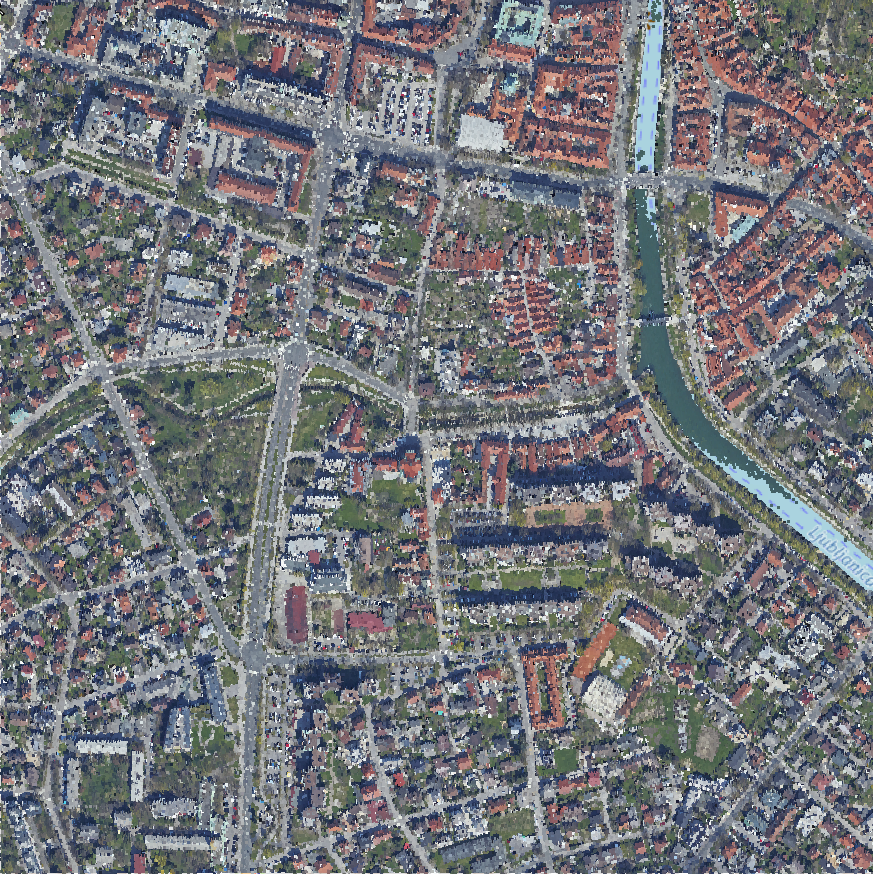

### Let's continue by segmenting some buildings

In [ ]:
import json
import subprocess
import os

# vhodna LAS datoteka
laz_file = "/media/lubuntu/USBDATA/copc/GKOT_461_100.copc.laz"
ime = os.path.splitext(os.path.basename(laz_file))[0]
out_raster = "/media/lubuntu/USBDATA/results/buildings_mask.tif"

# definiraj PDAL pipeline
pipeline = {
    "pipeline": [
        {
            "type": "readers.copc",
            "filename": laz_file
        },
        {
            "type": "filters.range",
            "limits": "Classification[6:6]"
        },
        {
            "type": "writers.gdal",
            "filename": out_raster,
            "resolution": 1.0,
            "output_type": "count",
            "data_type": "uint16",
            "nodata": 0
        }
    ]
}

# shrani in zaženi pipeline
pipeline_file = f"{ime}_raster_pipeline.json"
with open(pipeline_file, 'w') as f:
    json.dump(pipeline, f)

subprocess.run(["pdal", "pipeline", pipeline_file])


### Open the results in QGIS and lets debate about it.

In [ ]:
import tifffile as tiff
import numpy as np
from skimage.morphology import erosion, rectangle
import matplotlib.pyplot as plt

# 2) Load the GeoTIFF mask
mask_path = "/media/lubuntu/USBDATA/results/buildings_mask.tif"
data = tiff.imread(mask_path)

# 3) Binarize mask (>0 → 1)
binary = (data > 0).astype(np.uint8)

# 4) Erode with a 3×3 rectangle
eroded = erosion(binary, rectangle(3, 3))

# 5) Plot original vs. eroded mask
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(binary, cmap='gray')
ax[0].set_title("Original mask")
ax[0].axis("off")
ax[1].imshow(eroded, cmap='gray')
ax[1].set_title("Eroded mask")
ax[1].axis("off")
plt.tight_layout()
plt.show()


In [ ]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import numpy as np

# Distance transform and local maxima from eroded mask
distance = ndi.distance_transform_edt(eroded)
coords = peak_local_max(distance, labels=eroded, min_distance=20)

# Marker image
markers = np.zeros_like(eroded, dtype=np.int32)
for i, (r, c) in enumerate(coords, 1):
    markers[r, c] = i

# Watershed segmentation
labels_ws = watershed(-distance, markers, mask=eroded)

# Filter small regions (< 80 px ≈ 20 m² at 0.5 m GSD)
filtered = np.zeros_like(labels_ws, dtype=np.int32)
for region in regionprops(labels_ws):
    if region.area >= 100:
        filtered[labels_ws == region.label] = region.label

# Count and plot
n_buildings = filtered.max()
plt.figure(figsize=(12, 10))
plt.imshow(filtered, cmap="nipy_spectral")
plt.title(f"Watershed segmentation — {n_buildings} buildings")
plt.axis("off")
plt.tight_layout()
plt.show()


### Visualize the products as 3D

### Set a smaller computational region for checking how would we like the data processed

In [ ]:
gs.run_command("g.region",save='my_region',flags="s") # Let's save our region in the GRASS way
region_dict = gs.parse_command("g.region",flags="gu") # Tthe parse_command parses the region parameters into a dictionary

In [ ]:
# Create a copy of the original region dictionary
smaller_region_dict = region_dict.copy()

# Update specific keys in the new dictionary
# Set the values of the extent you want to examine
updates = {
    'n': '100760',
    's': '100660',
    'w': '460800',
    'e': '460900'
}
# Apply the updates to the new dictionary
smaller_region_dict.update(updates)

### Let's update momentarily our region so we can visualize a smaller portion of it

In [ ]:
n=int(smaller_region_dict['n'])
s=int(smaller_region_dict['s'])
w=int(smaller_region_dict['w'])
e=int(smaller_region_dict['e'])
univar_stat=gs.parse_command('r.univar',map='point_cloud_1m', flags='g')
z_min=float(univar_stat['min'])
z_max=float(univar_stat['max'])

gs.run_command("g.region",
               save='smaller_region',
               n=n,
               s=s,
               w=w,
               e=e,
               flags="d")
gs.run_command("g.region",region='smaller_region')

In [ ]:
gs.run_command("g.region",
               save='smaller_region',
               n=int(smaller_region_dict['n']),
               s=int(smaller_region_dict['s']),
               w=int(smaller_region_dict['w']),
               e=int(smaller_region_dict['e']),
               flags="d")
gs.run_command("g.region",region='smaller_region')

### Let's do a 3D check of the region: tiledb will manage that our computer survives

In [ ]:
data = os.path.expanduser("/mostar/copc/GKOT_461_100.copc.laz")
array_name = os.path.expanduser("/mostar/results/tiledb_pc")
filename = "/GKOT_461_100.copc.laz"

Let's create a PDAL pipeline to import our LAZ into a tiledb database.

In [ ]:
import subprocess
import json

data = "/media/lubuntu/USBDATA/copc/GKOT_461_100.copc.laz"
array_name = "/media/lubuntu/USBDATA/results/tiledb_pc"

pipeline = {
    "pipeline": [
        {
            "type": "readers.las",
            "filename": data
        },
        {
            "type": "writers.tiledb",
            "filename": array_name,
            "x_tile_size": 100,
            "y_tile_size": 100,
            "z_tile_size": 100,
        }
    ]
}

subprocess.run(
    ["pdal", "pipeline", "--stdin"],
    input=json.dumps(pipeline),
    text=True,
    check=True
)


### Let's inspect our point cloud stored in tiledb

In [ ]:
# 1) Read classifications from TileDB point-cloud array
import tiledb, numpy as np, pandas as pd
import matplotlib.pyplot as plt

with tiledb.open(array_name, "r") as A:
    cls = A.query(attrs=["Classification"])[:]["Classification"]

# 2) Build histogram as DataFrame
vals, counts = np.unique(cls, return_counts=True)
df = pd.DataFrame({"Classification": vals, "Count": counts})
df = df.sort_values("Count", ascending=False).reset_index(drop=True)

# 3) Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(df["Classification"].astype(str), df["Count"])
plt.xlabel("Classification")
plt.ylabel("Count")
plt.title("Histogram of Classification")
plt.tight_layout()
plt.show()


In [ ]:
A = tiledb.open(array_name)
print(A.schema.domain)

In [ ]:
from pybabylonjs import Show as show
import tiledb

A = tiledb.open(array_name)

# Valid domain-sliced query
df = A.query(attrs=('Red', 'Green','Blue')).df[
    461150:461250,  # X
    100300:100400,  # Y
    231:300         # Z
]

data = {
    'X': df['X'],
    'Y': df['Y'],
    'Z': df['Z'],
    'Red': df['Red'],
    'Green': df['Green'],
    'Blue': df['Blue']
}

show.point_cloud(source="dict",
                 data=data,
                 point_size=4,
                 rgb_max=65535,
                 width=1200,
                 height=700)